# Workspace

A workspace contains the current state: the *active config*, the *active scorestrucutre*,
a playback engine, etc. Many actions, like note playback, notation rendering, etc.,
use the active workspace to determine tempo, score structure, default playback instrument,
etc.


## Contents

* [The active workspace](#The-active-workspace)
* [Parts of a Workspace](#Parts-of-a-Workspace)
    * [Active Config](#The-active-Config)
    * [Environment](#Environment)
    * [Dynamics](#Dynamics)
* [Testing Dynamics: Berio's "O King"](#Testing-dynamics)

In [22]:
from maelzel.core import *
from IPython.display import display

## The active workspace

To customize a Workspace for a specific task there are three slightly different methods:

### 1. Modify the active Workspace

We modify the workspace by setting a new configuration

In [23]:
w = getWorkspace()
config = w.config.clone({
    'play.numChannels': 4,
    'show.pngResolution': 300,
    'quant.complexity': 'high'
})
w.config = config

### 2. Create a new Workspace with the needed customizations

In [15]:
w = Workspace(scorestruct=ScoreStruct(timesig=(3, 4), tempo=72),
              updates={'play.numChannels': 4,
                       'show.pngResolution': 300,
                       'quant.complexity': 'high'})
w.activate()

Workspace(scorestruct=ScoreStruct(tempo=72, timesig=(3, 4)), config={'show.pngResolution': 300, 'play.numChannels': 4}, dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

#### 3. Temporary Workspace (as context manager)

Chain([4C:0.5♩, 4C#:0.5♩, 4D:0.5♩, 4D#:0.5♩, 4E:0.5♩, 4F:0.5♩, 4F#:0.5♩, 4G:0.5♩, 4G#:0.5♩, 4A:0.5♩, …])
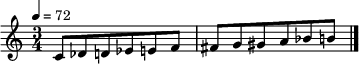

OfflineRenderer(sr=44100)
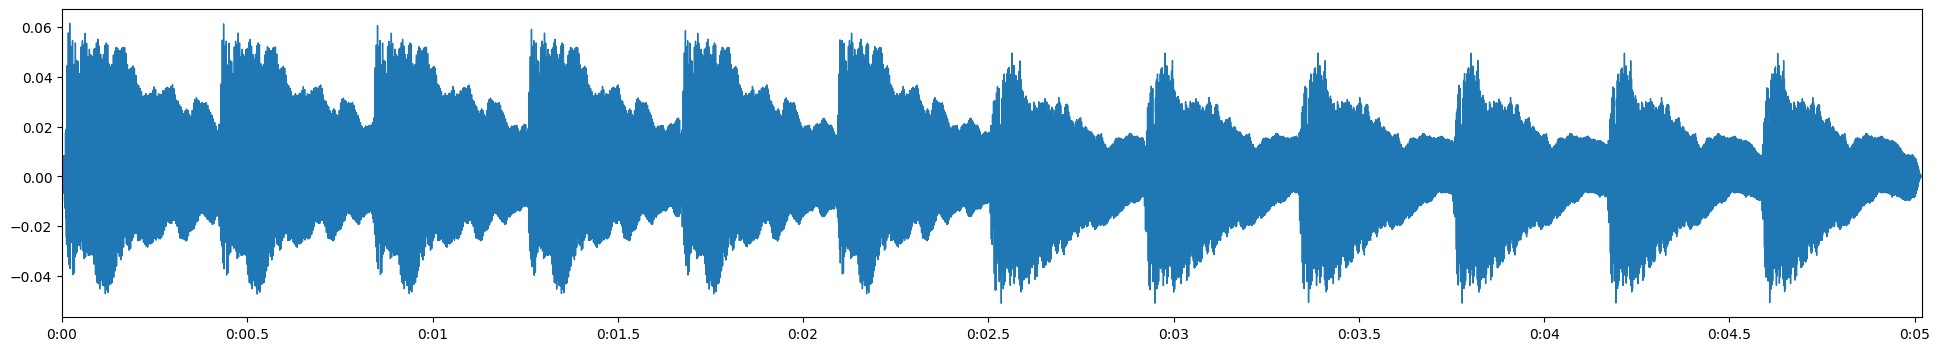

In [18]:
with Workspace(scorestruct=ScoreStruct(timesig=(3, 4), tempo=72)):
    scale = Chain(Note(m, dur=0.5) for m in range(60, 72))
    display(scale)
    display(scale.rec(instr='.piano', nchnls=1))

-----

## Parts of a Workspace

The workspace bundles the different elements which determine playback, notation and general behaviour of **maelzel.core**

* `.config`: holds the active configuration
* `.scorestruct`: the active score structure
* `.dynamicsCurve`: determines the mapping between amplitude and musical dynamic. This is used for playback and transcription
* `.a4`: the reference frequency for A4
* `.renderer`: used internally when rendering offline. When an object (note, chord, voice, …) is played it uses this attribute to check how to route the generated playback events

### The active Config

The `.config` attribute of the active Workspace holds the active configuration. This is a subclass of `dict` and holds defaults and customizations regarding playback, notation, etc

In [24]:
config = w.config
assert config is getConfig()

config

Key,Value,Type,Descr
A4,442,between 10 - 10000,"Freq. of the Kammerton A4. Normal values are 440, 442, 443 or 432 for old tuning, but any 'fantasy' value can be used"
splitAcceptableDeviation,4,type: int,"When splitting notes between staves, notes within this range of the split point will be grouped together if they all fit"
chordAdjustGain,True,type: bool,"Adjust the gain of a chord according to the number of notes, to prevent clipping"
reprShowFreq,False,type: bool,Show frequency when printing a Note in the console
semitoneDivisions,4,"{1, 2, 4}","The number of divisions per semitone (2=quarter-tones, 4=eighth-tones)"
musescorepath,,type: str,The command to use when calling MuseScore. For macOS users: it must be an absolute path pointing to the actual binary inside the .app bundle
reprShowFractionsAsFloat,True,type: bool,"All time offsets and durations are kept as rational numbers to avoid rounding errors. If this option is True, these fractions are printed as floats in order to make them more readable."
jupyterHtmlRepr,True,type: bool,"If True, output html inside jupyter as part of the _repr_html_ hook. Under certain circumstances (for example, when generating documentation from a notebook) this html might result in style conflict. Setting in False will just output plain text"
fixStringNotenames,False,type: bool,"If True, pitches given as string notenames are fixed at the spelling given at creation. Otherwise pitches might be respelled to match their context for better readability. Pitches given as midi notes or frequencies are always respelled"
openImagesInExternalApp,False,type: bool,"Force opening images with an external tool, even when inside a Jupyter notebook"


### Environment

Some aspects of the environment can be queried through the Workspace

* `recordPath()`: returns the path where recordings are placed whenever the user does not give an absolute path
* `presetsPath()`: presets created via `defPreset` are saved in this path and loaded in future sessions. 

In [20]:
w.recordPath()

'/home/em/.local/share/maelzel/recordings'

In [21]:
w.presetsPath()

'/home/em/.local/share/maelzel/core/presets'

## Dynamics

*Mapping dynamic expressions to amplitudes*

The dynamic curve within the active Workspace is used to map dynamics to amplitude for playback, or to transcribe amplitudes as dynamics


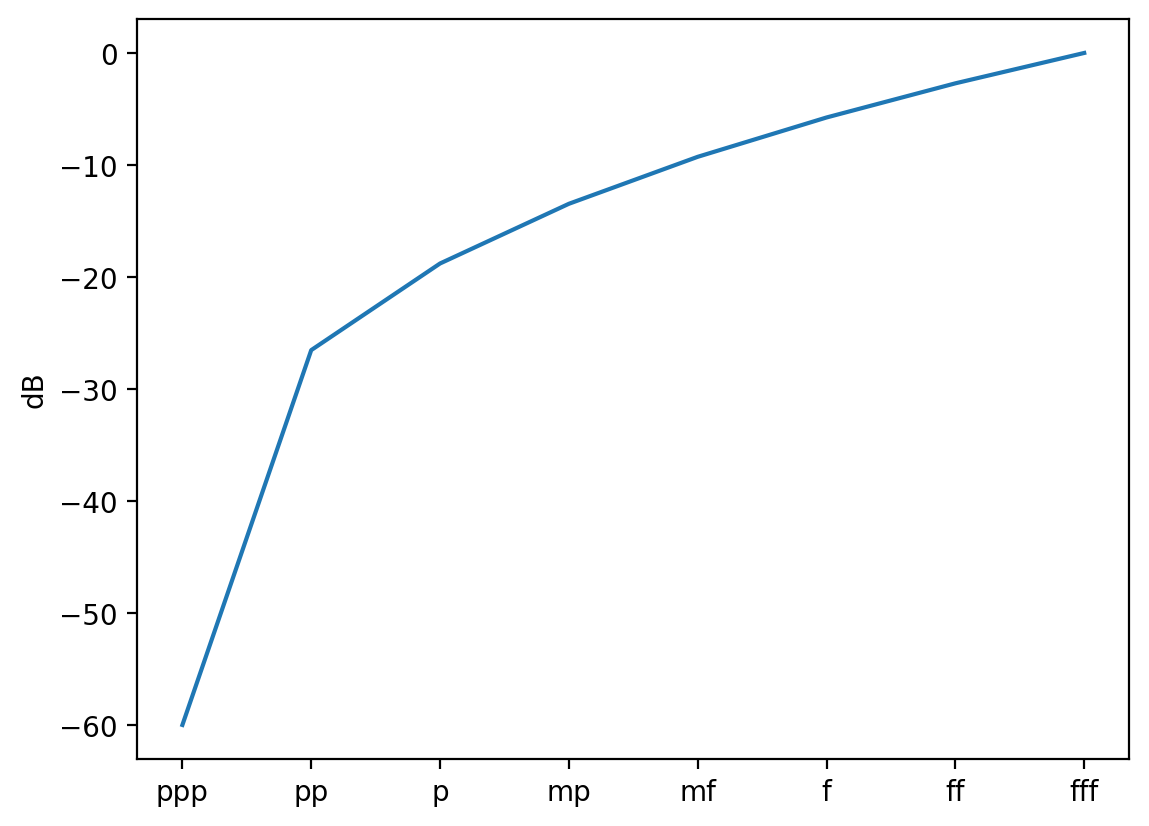

In [11]:
w.dynamicCurve.plot()

### Testing dynamics

**Luciano Berio, "O King"**

![](assets/oking1.png)

Chain([4F:4♩, 4A:2.5♩, 4F, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩, 4F, 4A:1.5♩, …])
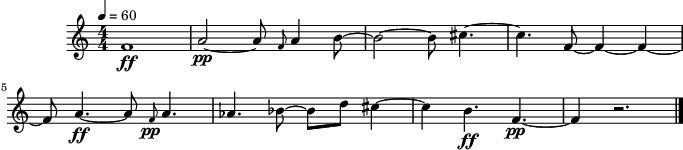

In [6]:
# Reset any active scorestruct to the default
setScoreStruct()

events = [
    "4F:4:ff",
    "4A:2.5:pp",
    "4F:0",    # dur=0 indicates a grace note
    "4A:1:pp",
    "4B:3",
    "5C#:3",
    "4F:3",
    "4A:2:ff",
    "4F:0:pp",
    "4A:1.5:pp",
    "4Ab:1.5",
    "4Bb:1",
    "5D:.5",
    "5C#:2",
    "4B:1.5:ff",
    "4F:2.5:pp"
]
voice = Chain(events)
voice


Set the score structure to match the original. Either the `.scorestruct` attribute can be modified directly or the function `setScoreStruct` can be used

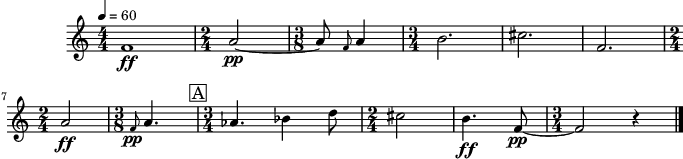

In [7]:
w = getWorkspace()
w.scorestruct = ScoreStruct('''
  4/4, 60
  2/4
  3/8
  3/4
  .
  .
  2/4
  3/8
  3/4,,A
  2/4
  .
  3/4
  4/4
  3/4
  4/4
  3/4
  2/4
  4/4
  .
  2/4,,B
''')
voice.show()

Play with the default instr (piano, with pedal)

OfflineRenderer(sr=44100)
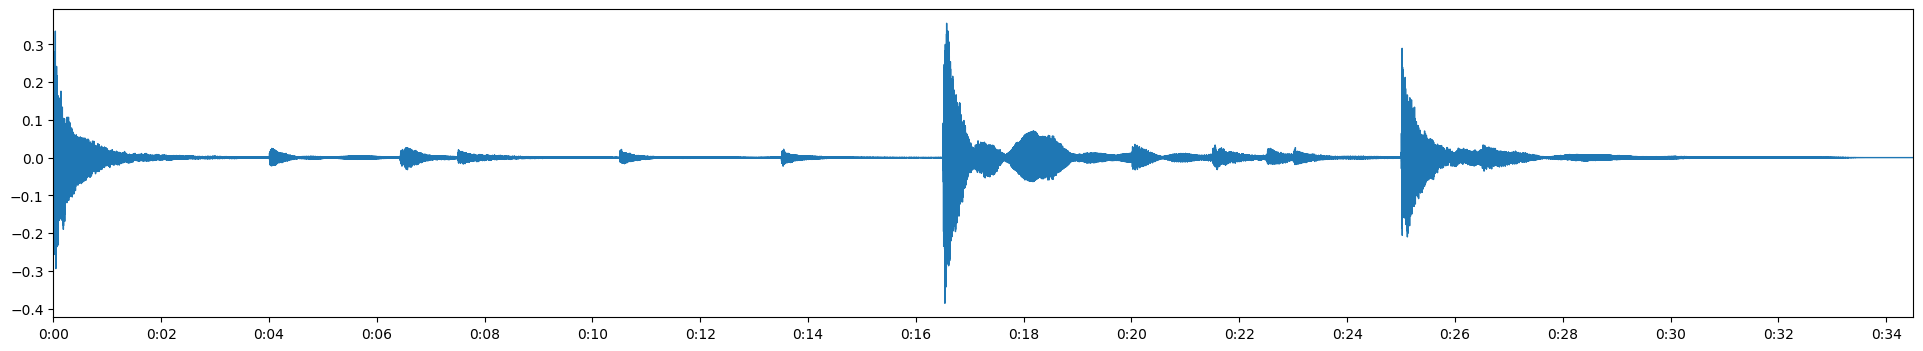

In [9]:
# voice.play(instr='piano', sustain=8, gain=2)

r = voice.rec("tmp/oking.ogg", instr='piano', sustain=8, nchnls=1, gain=2)
r

A dynamic curve with less contrast

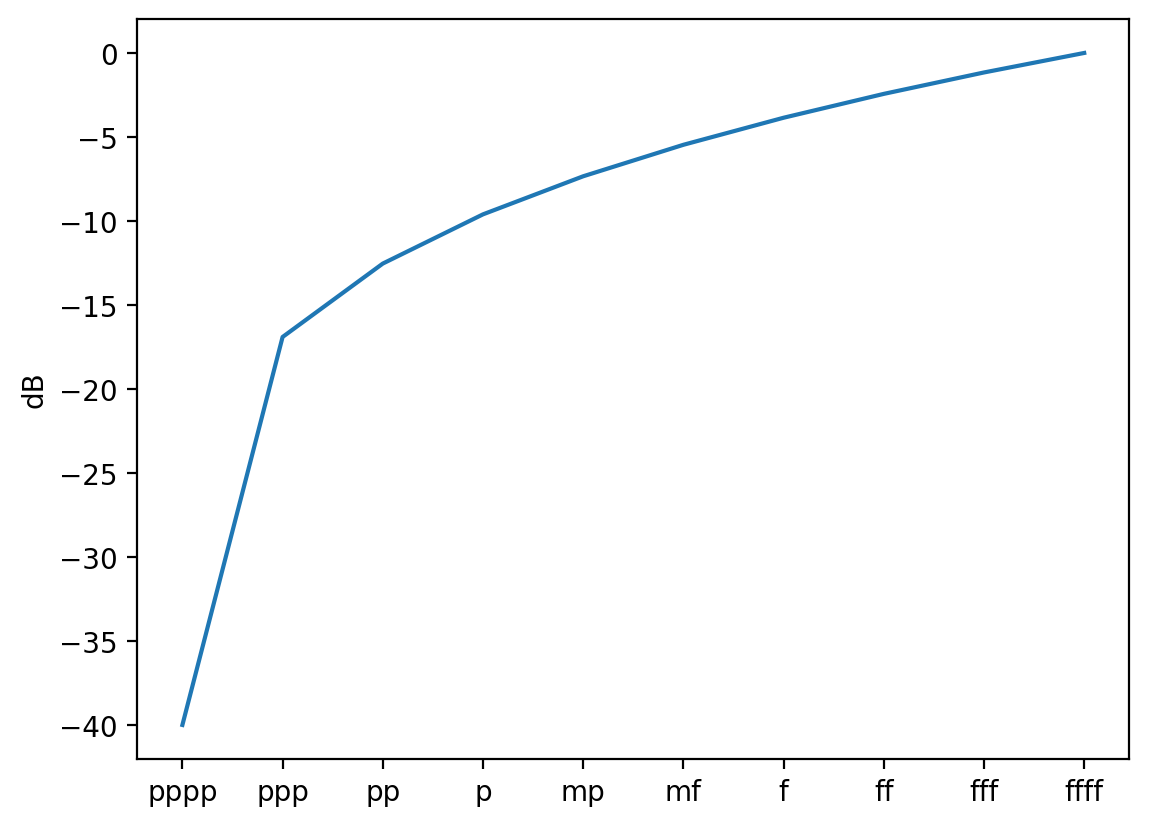

In [10]:
dyncurve = workspace.DynamicCurve.fromdescr(shape='expon(0.25)', mindb=-40)
dyncurve.plot()

OfflineRenderer(sr=44100)
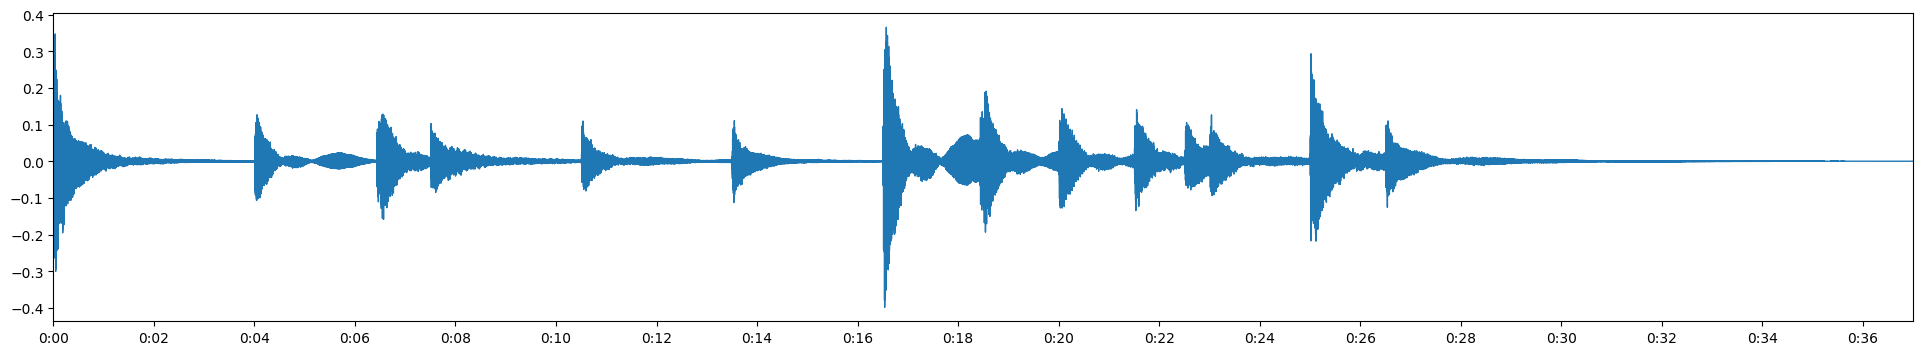

In [13]:
with Workspace(dynamicCurve=dyncurve):
    voice.rec(instr='piano', sustain=8, gain=2, nchnls=1).show()